In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [244]:
runs = 1000
steps = 1000
bandits = 10
Alpha = [.1, .4]
Base = [0, 1]

In [245]:
q1 = np.random.normal(4,1,bandits) # true values
q2 = np.random.normal(0,1,bandits)
results = np.zeros([4,runs,steps-1])
optimal = np.zeros([4,runs,steps-1])

In [246]:
def softmax(a, i):
    return np.exp(a[i])/np.sum(np.exp(a))
# def softmax (a, i):
#     b = 0
#     for j in range(len(a)):
#         b = b + np.exp(a[j])
#     return np.exp(a[i])/b

In [247]:
for l, alpha in enumerate(Alpha):
    for m, base in enumerate(Base):
        if base == 0:
            q = q2
        else:
            q = q1
            
        for k in range(runs):
            R = np.zeros(steps-1) # actual rewards
            gained_reward = np.zeros(steps-1) # gained reward in each step
            A = np.zeros(steps-1) # selected actions
            opt = np.zeros(steps-1) # percentage of optimal choice
            Q = np.zeros(bandits) # value
            H = np.zeros([steps,bandits]) # preferences
#             H[0,] = np.random.rand(bandits,)
            p = np.zeros([steps-1,bandits])
            counts = np.zeros(bandits) # counts of numbers each bandit was selected
            for j in range(steps-1):
                p[j,] = [softmax(H[j,], i) for i in range(bandits)]
#                 A[j] = np.argmax(p[j,])
                index = np.where(p[j,] == np.amax(p[j,]))
                A[j] = random.choice(index[0])
                idx = A[j].astype(int)
                R[j] = np.random.normal(q[idx],1)
                R_mean = np.mean(R[0:j+1])
                gained_reward[j] = R[j]
                counts[idx] = counts[idx] + 1  
                for i in range(bandits):
                    if i == idx:
                        H[j+1,i] = H[j,i] + alpha * (R[j] - base * R_mean) * (1 - p[j, i])
                    else:
                        H[j+1,i] = H[j,i] - alpha * (R[j] - base * R_mean) * p[j, i]
                if idx == np.argmax(q): 
                    opt[j] = 100
            n = 2*l+m
            results[n,k,] = np.cumsum(gained_reward)/np.arange(1,steps)
            optimal[n,k,] = np.cumsum(opt)/np.arange(1,steps)

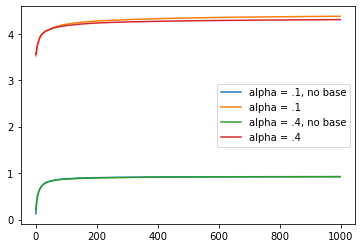

In [248]:
plt.plot(range(steps-1), np.mean(results[0],0), label = 'alpha = .1, no base')
plt.plot(range(steps-1), np.mean(results[1],0), label = 'alpha = .1')
plt.plot(range(steps-1), np.mean(results[2],0), label = 'alpha = .4, no base')
plt.plot(range(steps-1), np.mean(results[3],0), label = 'alpha = .4')
plt.legend()

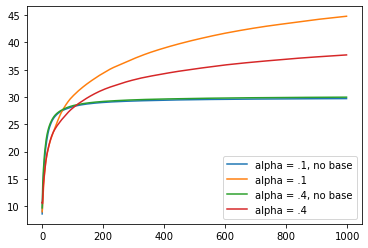

In [249]:
plt.plot(range(steps-1), np.mean(optimal[0],0), label = 'alpha = .1, no base')
plt.plot(range(steps-1), np.mean(optimal[1],0), label = 'alpha = .1')
plt.plot(range(steps-1), np.mean(optimal[2],0), label = 'alpha = .4, no base')
plt.plot(range(steps-1), np.mean(optimal[3],0), label = 'alpha = .4')
plt.legend()